In [1]:
!pip install -U qiskit qiskit-aer qiskit-ibm-runtime


In [2]:
# Grover's Search Algorithm using Qiskit 2.x
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [6]:
# --- Imports ---
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Helper Functions (from your original code, slightly modified) ---

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    # Qiskit's bit ordering is from right to left (q0 is the rightmost bit)
    # We reverse the string to match this intuition, so "101" targets qubit 2=1, qubit 1=0, qubit 0=1
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

    # Apply multi-controlled Z-gate (implemented as H-MCX-H)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    # Flip bits back
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (reflection about the |s> state)."""
    qc.h(range(n))
    qc.x(range(n))

    # Apply multi-controlled Z-gate
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    qc.x(range(n))
    qc.h(range(n))

def run_ideal_simulation(qc, title="Ideal Simulation"):
    """Executes the circuit on an ideal simulator and plots the histogram."""
    print(f"--- Running: {title} ---")
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    print(f"Counts: {counts}")
    plot_histogram(counts, title=title)
    plt.show() # In Colab, plt.show() is good practice to display the plot
    return counts

print("Setup complete. Helper functions are defined.")

Setup complete. Helper functions are defined.


In [7]:
# --- Original Problem (for reference) ---
print("--- Running Original 3-Qubit Search for '101' ---")
marked_state_original = "101"
n_original = len(marked_state_original)

# Build the circuit with 1 iteration
qc_original = QuantumCircuit(n_original, n_original)
qc_original.h(range(n_original))
oracle(qc_original, n_original, marked_state_original)
diffuser(qc_original, n_original)
qc_original.measure(range(n_original), range(n_original))

# Run and plot
run_ideal_simulation(qc_original, title="Original Search for '101' (1 Iteration)")

--- Running Original 3-Qubit Search for '101' ---
--- Running: Original Search for '101' (1 Iteration) ---
Counts: {'001': 36, '011': 30, '111': 27, '100': 40, '010': 28, '000': 35, '110': 24, '101': 804}


{'001': 36,
 '011': 30,
 '111': 27,
 '100': 40,
 '010': 28,
 '000': 35,
 '110': 24,
 '101': 804}

# ***TASK 1***

In [8]:
# --- Task 1: Change the marked state ("001") ---
marked_state_task1_a = "001"
n_task1_a = len(marked_state_task1_a)

qc_task1_a = QuantumCircuit(n_task1_a, n_task1_a)
qc_task1_a.h(range(n_task1_a))
oracle(qc_task1_a, n_task1_a, marked_state_task1_a)
diffuser(qc_task1_a, n_task1_a)
qc_task1_a.measure(range(n_task1_a), range(n_task1_a))

run_ideal_simulation(qc_task1_a, title="Task 1: Search for '001'")

--- Running: Task 1: Search for '001' ---
Counts: {'110': 33, '101': 37, '111': 29, '011': 33, '100': 38, '001': 797, '000': 27, '010': 30}


{'110': 33,
 '101': 37,
 '111': 29,
 '011': 33,
 '100': 38,
 '001': 797,
 '000': 27,
 '010': 30}

In [9]:
# --- Task 1: Change the marked state ("110") ---
marked_state_task1_b = "110"
n_task1_b = len(marked_state_task1_b)

qc_task1_b = QuantumCircuit(n_task1_b, n_task1_b)
qc_task1_b.h(range(n_task1_b))
oracle(qc_task1_b, n_task1_b, marked_state_task1_b)
diffuser(qc_task1_b, n_task1_b)
qc_task1_b.measure(range(n_task1_b), range(n_task1_b))

run_ideal_simulation(qc_task1_b, title="Task 1: Search for '110'")

--- Running: Task 1: Search for '110' ---
Counts: {'100': 41, '101': 34, '000': 26, '010': 35, '011': 22, '111': 35, '001': 35, '110': 796}


{'100': 41,
 '101': 34,
 '000': 26,
 '010': 35,
 '011': 22,
 '111': 35,
 '001': 35,
 '110': 796}

# ***TASK 2***

In [10]:
# --- Task 2: Modify the number of qubits (4 qubits) ---
marked_state_task2 = "1011"
n_task2 = len(marked_state_task2)

qc_task2 = QuantumCircuit(n_task2, n_task2)
qc_task2.h(range(n_task2))
oracle(qc_task2, n_task2, marked_state_task2)
diffuser(qc_task2, n_task2)
qc_task2.measure(range(n_task2), range(n_task2))

run_ideal_simulation(qc_task2, title="Task 2: 4-Qubit Search for '1011' (1 Iteration)")

--- Running: Task 2: 4-Qubit Search for '1011' (1 Iteration) ---
Counts: {'0001': 40, '1111': 30, '1011': 518, '0011': 24, '0111': 43, '1101': 41, '1000': 35, '0110': 38, '1100': 30, '0101': 31, '1001': 34, '0000': 29, '0010': 29, '1110': 29, '1010': 35, '0100': 38}


{'0001': 40,
 '1111': 30,
 '1011': 518,
 '0011': 24,
 '0111': 43,
 '1101': 41,
 '1000': 35,
 '0110': 38,
 '1100': 30,
 '0101': 31,
 '1001': 34,
 '0000': 29,
 '0010': 29,
 '1110': 29,
 '1010': 35,
 '0100': 38}

# ***TASK 3***

In [11]:
# --- Task 3: Add multiple iterations ---
marked_state_task3 = "1011"
n_task3 = len(marked_state_task3)
N_task3 = 2**n_task3

# Calculate optimal iterations
R_task3 = int(np.floor(np.pi / 4 * np.sqrt(N_task3)))
print(f"--- Task 3: 4-Qubit Search ({N_task3} items) ---")
print(f"Optimal iterations: {R_task3}")

qc_task3 = QuantumCircuit(n_task3, n_task3)
qc_task3.h(range(n_task3)) # Initial superposition

# Apply Grover iterations (Oracle + Diffuser)
for _ in range(R_task3):
    oracle(qc_task3, n_task3, marked_state_task3)
    diffuser(qc_task3, n_task3)

qc_task3.measure(range(n_task3), range(n_task3))

run_ideal_simulation(qc_task3, title=f"Task 3: 4-Qubit Search with {R_task3} Iterations")

--- Task 3: 4-Qubit Search (16 items) ---
Optimal iterations: 3
--- Running: Task 3: 4-Qubit Search with 3 Iterations ---
Counts: {'1111': 1, '1101': 5, '1011': 975, '0011': 4, '0111': 3, '0100': 2, '1100': 2, '0010': 2, '0000': 4, '1110': 6, '1001': 3, '0101': 3, '0001': 4, '1010': 4, '1000': 2, '0110': 4}


{'1111': 1,
 '1101': 5,
 '1011': 975,
 '0011': 4,
 '0111': 3,
 '0100': 2,
 '1100': 2,
 '0010': 2,
 '0000': 4,
 '1110': 6,
 '1001': 3,
 '0101': 3,
 '0001': 4,
 '1010': 4,
 '1000': 2,
 '0110': 4}

# ***TASK 4***

--- Task 4: Visualizing Circuit from Task 3 ---


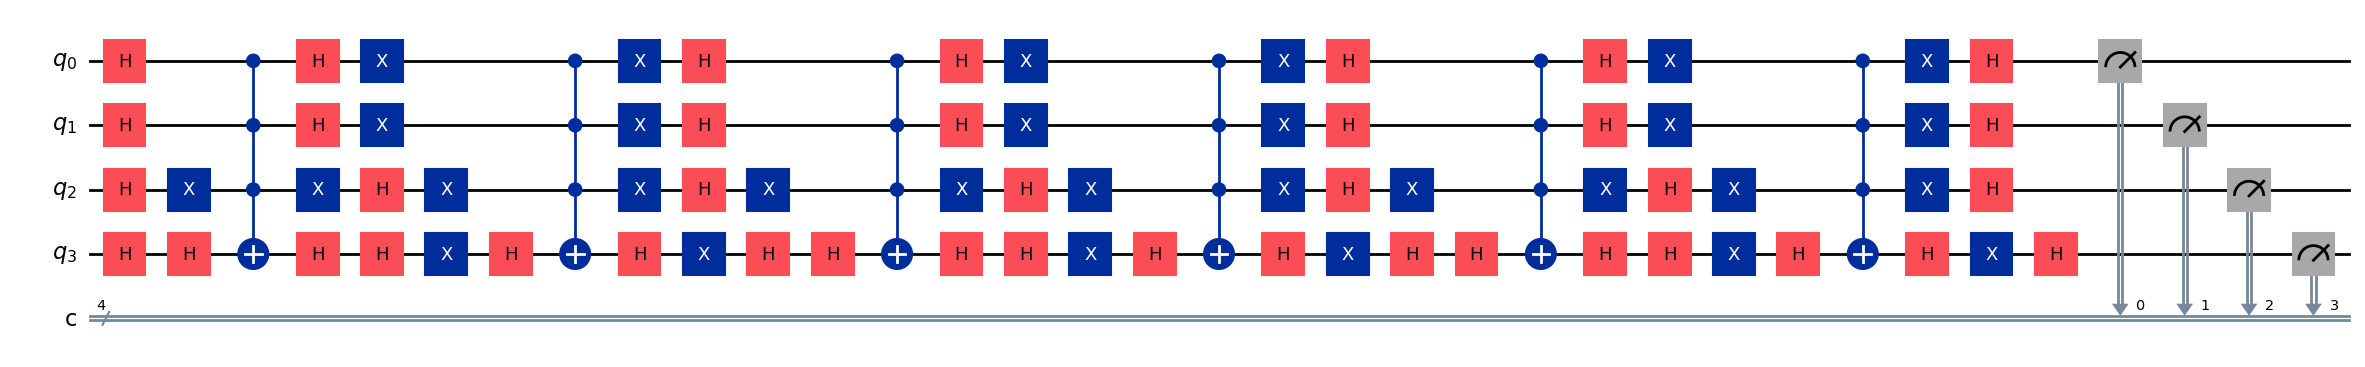

In [12]:
# --- Task 4: Circuit Visualization (Modified) ---
print("--- Task 4: Visualizing Circuit from Task 3 ---")

fig = qc_task3.draw('mpl', fold=-1)

fig

In [13]:
!pip install pylatexenc

# ***TASK 5***

--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---
--- Running: Task 5: Ideal Run (for comparison) ---
Counts: {'001': 26, '011': 34, '111': 39, '110': 27, '010': 31, '000': 37, '100': 34, '101': 796}
Plotting Ideal vs. Noisy results...


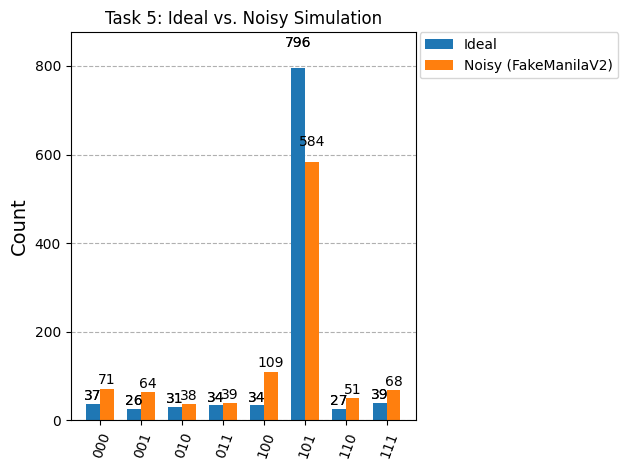

In [14]:
# --- Task 5: Experiment with Noise (Corrected Version 3) ---
try:
    from qiskit_ibm_runtime.fake_provider import FakeManilaV2
    from qiskit_aer import AerSimulator
    from qiskit_aer.noise import NoiseModel
    from qiskit import QuantumCircuit, transpile
    from qiskit.visualization import plot_histogram
    import matplotlib.pyplot as plt

    print("--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---")

    # 1. Get a mock backend (V2 is the modern version)
    backend_task5 = FakeManilaV2()

    # 2. Build a noise model from the backend's properties
    noise_model_task5 = NoiseModel.from_backend(backend_task5)

    # 3. Get coupling map and basis gates
    coupling_map_task5 = backend_task5.configuration().coupling_map
    basis_gates_task5 = backend_task5.configuration().basis_gates

    # 4. Create the noisy simulator
    noisy_simulator = AerSimulator.from_backend(backend_task5)

    # 5. We'll re-run the simple 3-qubit search ("101")
    marked_state_task5 = "101"
    n_task5 = len(marked_state_task5)

    # Check oracle/diffuser definitions
    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise Exception("oracle() and diffuser() must be defined before running Task 5.")

    qc_task5 = QuantumCircuit(n_task5, n_task5)
    qc_task5.h(range(n_task5))
    oracle(qc_task5, n_task5, marked_state_task5)
    diffuser(qc_task5, n_task5)
    qc_task5.measure(range(n_task5), range(n_task5))

    # 6. Transpile for the noisy simulator
    transpiled_qc_task5 = transpile(qc_task5, noisy_simulator)

    # 7. Run and get noisy results
    result_noisy = noisy_simulator.run(transpiled_qc_task5, shots=1024).result()
    counts_noisy = result_noisy.get_counts()

    # 8. Get ideal results for comparison
    counts_ideal = run_ideal_simulation(qc_task5, title="Task 5: Ideal Run (for comparison)")

    # 9. Plot both histograms
    print("Plotting Ideal vs. Noisy results...")
    fig = plot_histogram(
    [counts_ideal, counts_noisy],
    legend=['Ideal', 'Noisy (FakeManilaV2)'],
    title="Task 5: Ideal vs. Noisy Simulation"
    )
    display(fig)


except ImportError:
    print("--- Task 5: FAILED ---")
    print("Could not import 'qiskit_ibm_runtime.fake_provider'.")
    print("Please install/update it with '!pip install qiskit-ibm-runtime -U'")
except Exception as e:
    print(f"--- Task 5: FAILED ---")
    print(f"An error occurred: {e}")


# ***TASK 6***

In [15]:
# --- Task 6: Real Hardware Execution (Corrected with Sampler without Session) ---
%matplotlib inline

import os
import matplotlib.pyplot as plt
from IPython.display import display

# Colab secrets
from google.colab import userdata

# Modern Qiskit runtime service, AND the Sampler primitive
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display


print("--- Task 6: Real Hardware Execution (Qiskit Runtime Primitives) ---")

try:
    # 1) Get IBM API key from Colab Secrets
    api_key = None
    try:
        api_key = userdata.get('IBM_API_KEY')
    except Exception as e_secret:
        raise RuntimeError("Colab secret 'IBM_API_KEY' not found or access not granted. "
                           "Add it in Colab sidebar -> Secrets and grant this notebook access.") from e_secret

    if not api_key:
        raise ValueError("IBM_API_KEY empty. Please set the secret with your IBM API key in Colab.")

    # 2) Save the credentials for Qiskit Runtime (this is often done automatically but explicit save is safer)
    # If you have multiple accounts or instances, you might need to specify channel, instance, etc.
    try:
         QiskitRuntimeService(channel="ibm_quantum").save_account(token=api_key, overwrite=True)
    except Exception as e_save:
         print(f"Warning: Could not save account. It might be already configured. Error: {e_save}")

    # 3) Create the runtime service object
    # This will load the saved account by default
    service = QiskitRuntimeService()


    # 4) Choose a real backend
    try:
        # Prioritize backends with 5 or more qubits, excluding simulators and non-operational ones
        backend_real = service.least_busy(simulator=False, min_num_qubits=5, operational=True)
    except Exception:
        # Fallback to any operational real backend if least_busy fails or finds none
        backends = service.backends(simulator=False, operational=True)
        if not backends:
            raise RuntimeError("No operational real backends available for your account.")
        backend_real = backends[0] # Pick the first one found

    print(f"Selected backend: {backend_real.name}")

    # 5) Build the 3-qubit oracle/diffuser circuit
    marked_state_task6 = "101"
    n_task6 = len(marked_state_task6)

    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise RuntimeError("oracle() and diffuser() are not defined. Run Cell 1.")

    qc_task6 = QuantumCircuit(n_task6, n_task6)
    qc_task6.h(range(n_task6))
    oracle(qc_task6, n_task6, marked_state_task6)
    diffuser(qc_task6, n_task6)
    qc_task6.measure(range(n_task6), range(n_task6))

    # 6) Transpile for the selected real backend
    print("Transpiling circuit for the real backend...")
    transpiled_qc_task6 = transpile(qc_task6, backend=backend_real)

    # 7) --- MODIFIED ---
    #    Initialize Sampler *without* a session for plans that don't support it.
    #    The backend is passed when running the job.
    print("Initializing Sampler without a Session...")
    sampler = Sampler(backend=backend_real)


    # 8) Submit job to the Sampler primitive (passing the backend explicitly is not needed here as it was in Sampler init)
    print(f"Sending job to real hardware ({backend_real.name}) using Sampler...")
    job = sampler.run(transpiled_qc_task6, shots=1024) # Backend is now implicitly from Sampler init
    print(f"Job ID: {job.job_id()}")

    # 9) Monitor progress
    print("Waiting for job to complete...")
    # Polling interval in seconds (adjust as needed)
    job.wait_for_final_state(timeout=600, # Timeout after 10 minutes
                             callback=lambda job_id, job_status: print(f"Job {job_id} status: {job_status}"))


    # 10) Retrieve results
    print("Job complete. Processing results...")
    result_real = job.result()

    # Sampler results have quasi_dists. We get the first one.
    quasi_dist = result_real.quasi_dists[0]

    # Convert quasi-distribution to standard binary probabilities
    counts_real_probs = quasi_dist.binary_probabilities(num_bits=n_task6)
    print("Probabilities from real hardware:", counts_real_probs)

    # 11) Ideal counts for comparison (re-run ideal simulation for fresh counts)
    if 'run_ideal_simulation' not in globals():
         raise RuntimeError("run_ideal_simulation() not defined.")

    print("\n--- Running Ideal Simulation for Comparison ---")
    counts_ideal_task6 = run_ideal_simulation(qc_task6, title="Task 6: Ideal Run (for comparison)")

    # 12) Plot results
    print("Plotting Ideal vs. Real Hardware results...")
    fig = plot_histogram([counts_ideal_task6, counts_real_probs],
                         legend=['Ideal (counts)', f'Real Hardware ({backend_real.name}) (probabilities)'],
                         title=f"Task 6: Ideal vs. Real Hardware ({backend_real.name})")
    display(fig)
    plt.show() # Ensure plot is displayed

except Exception as e:
    print("\n--- Task 6: FAILED ---")
    print(f"An error occurred: {e}")
    print("\nHints:")
    print("- Ensure you installed/updated qiskit, qiskit-aer, and qiskit-ibm-runtime and restarted the Colab runtime.")
    print("- Add your IBM API key in Colab Secrets (left sidebar → Secrets) named 'IBM_API_KEY' and grant this notebook access.")
    print("- Make sure oracle(), diffuser(), and run_ideal_simulation() are defined earlier in the notebook.")
    print("- If you still encounter authorization issues, your IBM Quantum Experience plan might not support the chosen backend or execution mode.")

--- Task 6: Real Hardware Execution (Qiskit Runtime Primitives) ---


qiskit_runtime_service.__init__:WARNING:2025-11-07 17:23:20,625: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-07 17:23:21,103: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-07 17:23:23,085: Using instance: open-instance, plan: open


Selected backend: ibm_torino
Transpiling circuit for the real backend...
Initializing Sampler without a Session...

--- Task 6: FAILED ---
An error occurred: SamplerV2.__init__() got an unexpected keyword argument 'backend'

Hints:
- Ensure you installed/updated qiskit, qiskit-aer, and qiskit-ibm-runtime and restarted the Colab runtime.
- Add your IBM API key in Colab Secrets (left sidebar → Secrets) named 'IBM_API_KEY' and grant this notebook access.
- Make sure oracle(), diffuser(), and run_ideal_simulation() are defined earlier in the notebook.
- If you still encounter authorization issues, your IBM Quantum Experience plan might not support the chosen backend or execution mode.
